In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install wordcloud

In [3]:
sms=pd.read_csv('messages.csv',encoding='latin-1')
sms.head()

,subject,message,label
0,job posting - apple-iss research center,content - length : 3386 apple-iss research cen...,0
1,NaN,"lang classification grimes , joseph e . and ba...",0
2,query : letter frequencies for text identifica...,i am posting this inquiry for sergei atamas ( ...,0
3,risk,a colleague and i are researching the differin...,0
4,request book information,earlier this morning i was on the phone with a...,0


In [4]:
sms.shape

(2893, 3)

In [5]:
# I have doroped subject feature because this not effect the label feature
sms.drop('subject', axis=1, inplace=True)

In [6]:
sms.label.value_counts()

0    2412
1     481
Name: label, dtype: int64

In [7]:
print("Normal message:>",round(len(sms[sms['label']==0])/len(sms.label),2)*100,'%')
print("Spam message:>",round(len(sms[sms['label']==1])/len(sms.label),2)*100,'%')

Normal message:> 83.0 %
Spam message:> 17.0 %


In [8]:
sms['message_length']=sms.message.str.len()
sms.head()

,message,label,message_length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [9]:
sms['message']=sms.message.str.lower()
sms.head()

,message,label,message_length
0,content - length : 3386 apple-iss research cen...,0,2856
1,"lang classification grimes , joseph e . and ba...",0,1800
2,i am posting this inquiry for sergei atamas ( ...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [10]:
#Replace with email
sms['message'] = sms['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','email-address')

#Replace url with web-address
sms['message'] = sms['message'].str.replace(r'^htpp\://[a-zA-Z0-9\-\.]+\.[a-zA-z]{2,3}(/\s*)?$','web-address')

#Replace money symbole with dollers
sms['message'] = sms['message'].str.replace(r'£|\$', 'dollers')

#Replace 10 digit number with phone-number
sms['message'] = sms['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}\)?[\s-]?[\d]{4}$','phone-number')

#Replace number with numbr
sms['message'] = sms['message'].str.replace(r'\d+(\.\d+)?','numbr')

In [11]:
sms['message'] = sms['message'].str.replace(r'[^\w\d\s]', ' ')

sms['message'] = sms['message'].str.replace(r'\s+', ' ')

sms['message'] = sms['message'].str.replace(r'^\s+|\s+?$',' ')

In [12]:
sms.head()

,message,label,message_length
0,content length numbr apple iss research center...,0,2856
1,lang classification grimes joseph e and barbar...,0,1800
2,i am posting this inquiry for sergei atamas sa...,0,1435
3,a colleague and i are researching the differin...,0,324
4,earlier this morning i was on the phone with a...,0,1046


In [13]:
import string
import nltk
from nltk.corpus import stopwords


stop_word = set(stopwords.words('english') +['s2u','hii','u','b/w','dont','ur','r'])

In [14]:
sms['message'] = sms['message'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_word))

In [15]:
sms['clean_message_length'] = sms.message.str.len()
sms.head()

,message,label,message_length,clean_message_length
0,content length numbr apple iss research center...,0,2856,2179
1,lang classification grimes joseph e barbara f ...,0,1800,1452
2,posting inquiry sergei atamas satamas umabnet ...,0,1435,1064
3,colleague researching differing degrees risk p...,0,324,210
4,earlier morning phone friend mine living south...,0,1046,629


In [16]:
print("Original length of message:>", sms.message_length.sum())
print("Clean length of message:>", sms.clean_message_length.sum())

Original length of message:> 9344743
Clean length of message:> 6766473


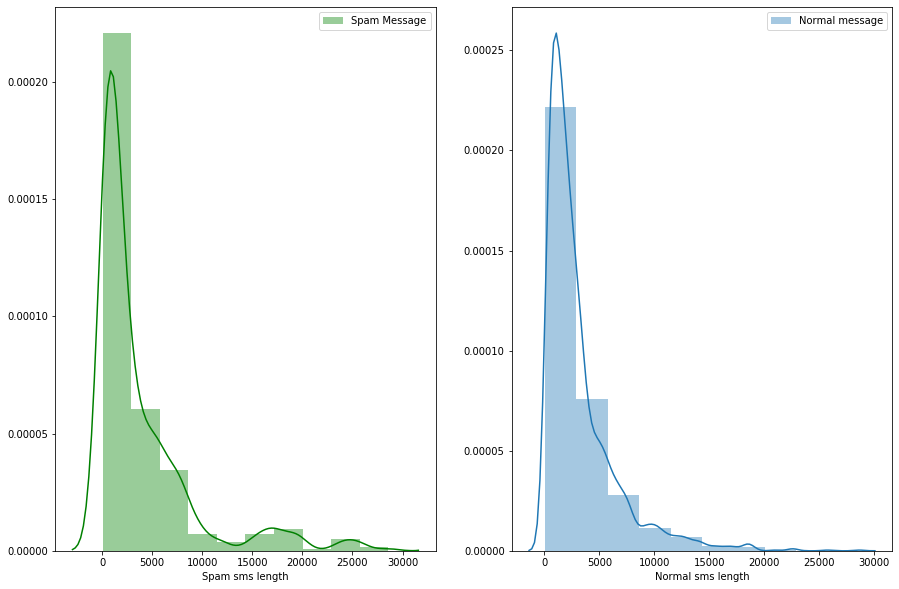

In [17]:
f,ax = plt.subplots(1,2, figsize=(15,10))

sns.distplot(sms[sms['label']==1]['message_length'],bins=10,ax=ax[0],label='Spam Message',color='g')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['message_length'],bins=10,ax=ax[1],label='Normal message')
ax[1].set_xlabel('Normal sms length')
ax[1].legend()

plt.show()

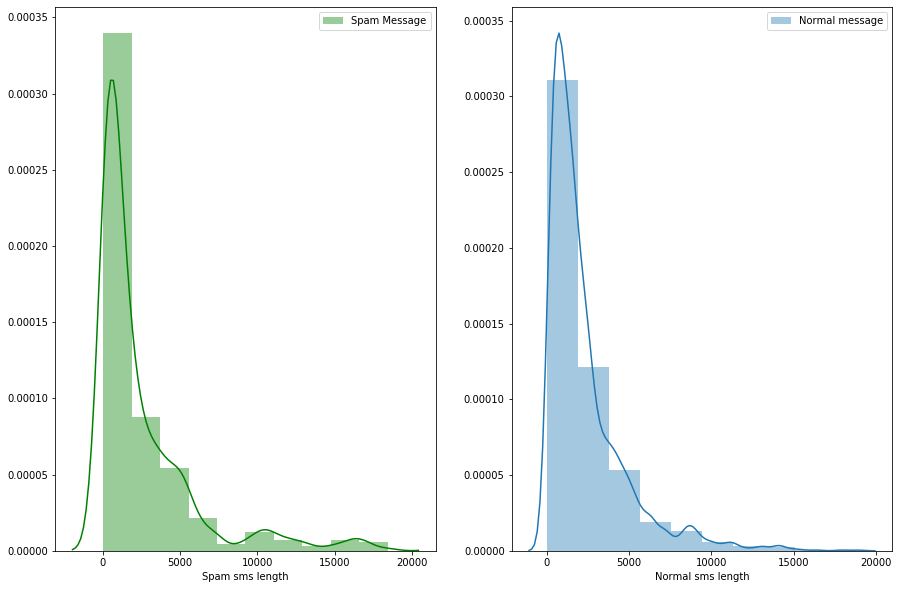

In [18]:
f,ax = plt.subplots(1,2, figsize=(15,10))

sns.distplot(sms[sms['label']==1]['clean_message_length'],bins=10,ax=ax[0],label='Spam Message',color='g')
ax[0].set_xlabel('Spam sms length')
ax[0].legend()

sns.distplot(sms[sms['label']==0]['clean_message_length'],bins=10,ax=ax[1],label='Normal message')
ax[1].set_xlabel('Normal sms length')
ax[1].legend()

plt.show()

In [19]:
from wordcloud import WordCloud

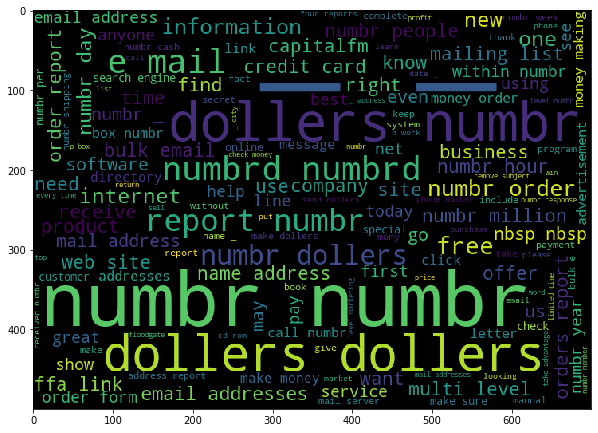

In [20]:
spam= sms['message'][sms['label']==1]
spam_word = WordCloud(height=500, width=700, margin=3, max_words=150, background_color='black').generate(' '.join(spam))

plt.figure(figsize=(10,8))
plt.imshow(spam_word)
plt.show()

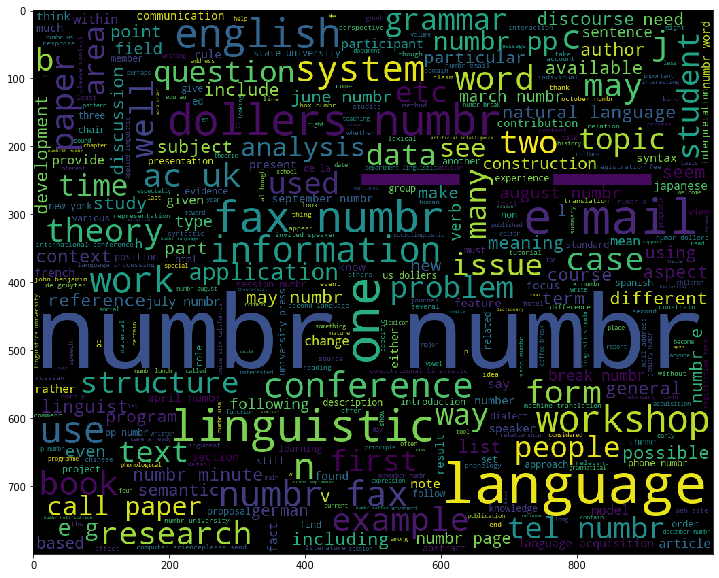

In [21]:
normal = sms['message'][sms['label']==0]
Right_word = WordCloud(height=800, width=1000, max_words=400, background_color='black').generate(' '.join(normal))

plt.figure(figsize=(15,10))
plt.imshow(Right_word)
plt.show()

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [23]:
tfidf = TfidfVectorizer()
feature = tfidf.fit_transform(sms['message'])

In [24]:
x=feature
y=sms['label']

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=40)

In [26]:
mnb, dtc, knn, rfc = MultinomialNB(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier()

In [27]:
mnb.fit(x_train, y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test, predmnb))
print(confusion_matrix(y_test, predmnb))
print(classification_report(y_test, predmnb))

0.8784530386740331
[[610   0]
 [ 88  26]]
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       610
           1       1.00      0.23      0.37       114

    accuracy                           0.88       724
   macro avg       0.94      0.61      0.65       724
weighted avg       0.89      0.88      0.84       724



In [28]:
dtc.fit(x_train, y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.9530386740331491
[[590  20]
 [ 14 100]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       610
           1       0.83      0.88      0.85       114

    accuracy                           0.95       724
   macro avg       0.91      0.92      0.91       724
weighted avg       0.95      0.95      0.95       724



In [29]:
knn.fit(x_train, y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.9696132596685083
[[593  17]
 [  5 109]]
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       610
           1       0.87      0.96      0.91       114

    accuracy                           0.97       724
   macro avg       0.93      0.96      0.95       724
weighted avg       0.97      0.97      0.97       724



In [30]:
rfc.fit(x_train, y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

0.9737569060773481
[[608   2]
 [ 17  97]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       610
           1       0.98      0.85      0.91       114

    accuracy                           0.97       724
   macro avg       0.98      0.92      0.95       724
weighted avg       0.97      0.97      0.97       724



In [31]:
from sklearn.externals import joblib
joblib.dump(rfc,'SpamDetection.obj')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['SpamDetection.obj']